# Paperspace Gradient: PyTorch Quick Start
Last modified: Sep 27th 2022

## Purpose and intended audience

This Quick Start tutorial demonstrates PyTorch usage in a Gradient Notebook. It is aimed at users who are relatviely new to PyTorch, although you will need to be familiar with Python to understand PyTorch code.

We use PyTorch to

- Build a neural network that classifies FashionMNIST images
- Train and evaluate the network
- Save the model
- Perform predictions

followed by some next steps that you can take to proceed with using Gradient.

The material is based on the original [PyTorch Quick Start](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) at the time of writing this notebook.

See the end of the notebook for the original copyright notice.

## Check that you are on a GPU machine

The notebook is designed to run on a Gradient GPU machine (as opposed to a CPU-only machine). The machine type, e.g., A4000, can be seen by clicking on the Machine icon on the left-hand navigation bar in the Gradient Notebook interface. It will say if it is CPU or GPU.

![quick_start_pytorch_images/example_instance_type.png](quick_start_pytorch_images/example_instance_type.png)

The *Creating models* section below also determines whether or not a GPU is available for us to use.

If the machine type is CPU, you can change it by clicking *Stop Machine*, then the machine type displayed to get a drop-down list. Select a GPU machine and start up the Notebook again.

For help with machines, see the Gradient documentation on [machine types](https://docs.paperspace.com/gradient/machines/) or [starting a Gradient Notebook](https://docs.paperspace.com/gradient/explore-train-deploy/notebooks).

## Working with data

PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

In [ ]:
#!python generate_denoise_dataset.py
#!python fine_tune_classifier_denoised.py
#!python  train_classifier.py
#!python  training_denoiser.py
!python run_expriments.py



=== Running Pipeline 1 for dose 1 ===
Weights path: /notebooks/resnet18-f37072fd.pth
File exists: True
Unique true labels: [0 1]
Unique predictions: [0]
Pipeline 1 - Dose 1 | Acc: 0.773 | AUC: 0.693 | Sensitivity: 0.000

=== Running Pipeline 2 for dose 1 ===
Weights path: /notebooks/resnet18-f37072fd.pth
File exists: True
Evaluating Denoiser:  14%|‚ñà‚ñà‚ñç               | 136/980 [26:38<2:58:19, 12.68s/it]

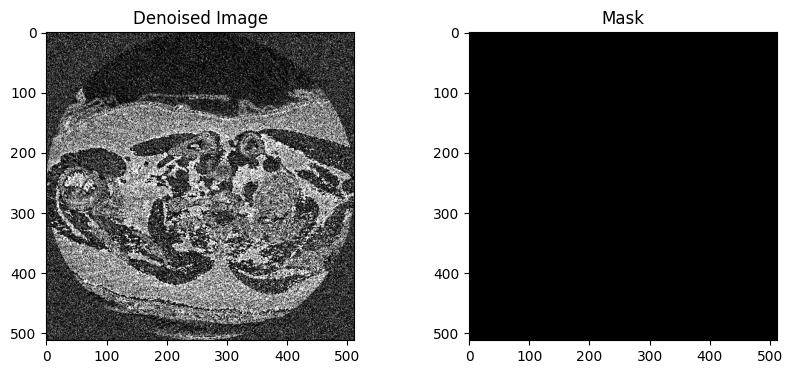

‚úÖ Displayed images from folder: sample_00000


In [7]:
#!python generate_denoise_dataset.pyimport numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os

# Point to your denoised dataset root
root = "/notebooks/denoised_dataset"

# List folders
folders = sorted(os.listdir(root))

if len(folders) == 0:
    print("‚ö†Ô∏è No folders found!")
else:
    # Pick any sample folder
    sample_folder = folders[0]

    image_path = os.path.join(root, sample_folder, "image.npz")
    mask_path = os.path.join(root, sample_folder, "mask.npz")

    # Load image
    data_image = np.load(image_path)
    denoised = data_image["image"]

    # Load mask
    data_mask = np.load(mask_path)
    mask = data_mask["mask"]

    # Show image
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(denoised, cmap="gray")
    plt.title("Denoised Image")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")

    plt.show()

    print(f"‚úÖ Displayed images from folder: {sample_folder}")



#!python fine_tune_classifier_denoised.py
#!python  train_classifier.py
#!python  training_denoiser.py
#!python run_expriments.py


PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this tutorial, we will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
CIFAR, COCO ([full list here](https://pytorch.org/vision/stable/datasets.html)). In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.

In [ ]:
#!python generate_denoise_dataset.py
#!python fine_tune_classifier_denoised.py
#!python  train_classifier.py
!python  training_denoiser.py
#!python run_expriments.py


‚úÖ Loaded training set with 8376 samples.
üîÑ Resuming from epoch 43
Epoch 44/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:59<00:00,  2.49it/s, loss=0.239]
Epoch 44 avg loss: 3421.054039
Epoch 45/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:06<00:00,  2.86it/s, loss=6.11e+4]
Epoch 45 avg loss: 3421.054046
Epoch 46/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:09<00:00,  2.83it/s, loss=0.208]
Epoch 46 avg loss: 3421.054017
Epoch 47/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [05:58<00:00,  2.92it/s, loss=0.777]
Epoch 47 avg loss: 3421.054032
Epoch 48/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [05:58<00:00,  2.92it/s, loss=0.152]
Epoch 48 avg loss: 3421.054022
Epoch 49/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:00<00:00,  2.90it/s, loss=2.07]
Epoch 49 avg loss: 3421.054033
Epoch 50/50:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ     | 695/1047 [03:59<01:57,  2.99it/s, lo

In [ ]:
!python generate_denoise_dataset.py
#!python fine_tune_classifier_denoised.py
#!python  train_classifier.py
#!python  training_denoiser.py
#!python run_expriments.py


‚úÖ Loaded training set with 8376 samples.
üîÑ Resuming from epoch 43
Epoch 44/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:59<00:00,  2.49it/s, loss=0.239]
Epoch 44 avg loss: 3421.054039
Epoch 45/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:06<00:00,  2.86it/s, loss=6.11e+4]
Epoch 45 avg loss: 3421.054046
Epoch 46/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:09<00:00,  2.83it/s, loss=0.208]
Epoch 46 avg loss: 3421.054017
Epoch 47/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [05:58<00:00,  2.92it/s, loss=0.777]
Epoch 47 avg loss: 3421.054032
Epoch 48/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [05:58<00:00,  2.92it/s, loss=0.152]
Epoch 48 avg loss: 3421.054022
Epoch 49/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1047/1047 [06:00<00:00,  2.90it/s, loss=2.07]
Epoch 49 avg loss: 3421.054033
Epoch 50/50:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ     | 695/1047 [03:59<01:57,  2.99it/s, lo

In [9]:
# Download training data from open datasets
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

NameError: name 'datasets' is not defined

In [3]:
#!python generate_denoise_dataset.py
#!python fine_tune_classifier_denoised.py
#!python  train_classifier.py
!python  training_denoiser.py
#!python run_expriments.py


‚úÖ Loaded training set with 8376 samples.
üîÑ Resuming from epoch 50
‚úÖ Denoiser saved to: /notebooks/saved_models/denoiser.pt


We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e., each element
in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
batch_size = 64

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Read more about [loading data in PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

## Creating models, including GPU

To define a neural network in PyTorch, we create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate
operations in the neural network, we move it to the GPU if available.

In [ ]:
# Get cpu or gpu device for training
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Read more about [building neural networks in PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

## Optimizing the model parameters

To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model's performance against the test dataset to ensure it is learning.

In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.

In [9]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304299  [    0/60000]
loss: 2.290307  [ 6400/60000]
loss: 2.268486  [12800/60000]
loss: 2.256835  [19200/60000]
loss: 2.248106  [25600/60000]
loss: 2.217304  [32000/60000]
loss: 2.215746  [38400/60000]
loss: 2.182278  [44800/60000]
loss: 2.179303  [51200/60000]
loss: 2.150798  [57600/60000]
Test Error: 
 Accuracy: 55.6%, Avg loss: 2.143109 

Epoch 2
-------------------------------
loss: 2.155640  [    0/60000]
loss: 2.144754  [ 6400/60000]
loss: 2.083586  [12800/60000]
loss: 2.091499  [19200/60000]
loss: 2.045041  [25600/60000]
loss: 1.986636  [32000/60000]
loss: 2.002200  [38400/60000]
loss: 1.927214  [44800/60000]
loss: 1.931510  [51200/60000]
loss: 1.847673  [57600/60000]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.857198 

Epoch 3
-------------------------------
loss: 1.893984  [    0/60000]
loss: 1.863075  [ 6400/60000]
loss: 1.748540  [12800/60000]
loss: 1.779858  [19200/60000]
loss: 1.666921  [25600/60000]
loss: 1.633243  [32000/600

Read more about [Training your model](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html).

## Saving models

A common way to save a model is to serialize the internal state dictionary (containing the model parameters).

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Loading models

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it.

In [11]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.



In [12]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


Read more about [Saving & Loading your model](https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html).

## Next steps

To proceed with PyTorch in Gradient, you can:
    
 - Look at other Gradient material, such as our [tutorials](https://docs.paperspace.com/gradient/tutorials/) and [blog](https://blog.paperspace.com)
 - Try out further [PyTorch tutorials](https://pytorch.org/tutorials/beginner/basics/intro.html)
 - Start writing your own projects, using our [documentation](https://docs.paperspace.com/gradient) when needed
 
If you get stuck or need help, [contact support](https://support.paperspace.com), and we will be happy to assist.

Good luck!

## Original PyTorch copyright notice

¬© Copyright 2021, PyTorch.